Test du projet de class trajets indirect

In [272]:
%load_ext autoreload
%autoreload 2
import sys #c'est pas propre mais pour le moment pour importer mes modules perso dans le notebook je ne sais pas faire
sys.path.append(r'C:\Users\martin.schoreisz\git\Outils\Outils\Martin_Perso')
import traitement_od as t
import pandas as pd
import numpy as np
import altair as alt
import datetime as dt
pd.set_option('display.max_colwidth', 1000)
import os
from sklearn.cluster import DBSCAN

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
%time df_journee=t.ouvrir_fichier_lapi('2019-01-29 00:00:00','2019-01-30 23:59:00')

Wall time: 1min 21s


In [4]:
liste_trajet=(pd.DataFrame([{'o_d':'A63-A10','trajets':[{'cameras':[19,4,5],'type_trajet':'indirect'},
                                                       {'cameras':[19,1,5],'type_trajet':'indirect'},
                                                       {'cameras':[19,5],'type_trajet':'direct'},
                                                      ]},
                          {'o_d':'A62-A10','trajets':[{'cameras':[10,4,5],'type_trajet':'indirect'},
                                                       {'cameras':[10,1,5],'type_trajet':'indirect'},
                                                       {'cameras':[10,5],'type_trajet':'direct'},
                                                      ]},
                           ]))

In [5]:
liste_trajet

,o_d,trajets
0,A63-A10,"[{'cameras': [19, 4, 5], 'type_trajet': 'indirect'}, {'cameras': [19, 1, 5], 'type_trajet': 'indirect'}, {'cameras': [19, 5], 'type_trajet': 'direct'}]"
1,A62-A10,"[{'cameras': [10, 4, 5], 'type_trajet': 'indirect'}, {'cameras': [10, 1, 5], 'type_trajet': 'indirect'}, {'cameras': [10, 5], 'type_trajet': 'direct'}]"


Pour une o_d, sur une journee

In [274]:
%%time 
dates= pd.date_range('2019-01-29', periods=24, freq='H')
for date in dates : 
    date=date.strftime("%Y-%m-%d %H:%M:%S")
    for index, value in liste_trajet.iterrows() : 
        o_d, carac_trajet=value[0],value[1]
        for dico_carac in carac_trajet :
            cameras=dico_carac['cameras']
            type_t=dico_carac['type_trajet']
            if type_t=='indirect' : 
                try :
                    trajet=t.trajet_indirect(df_journee,date, 60, 16, cameras)
                except t.PasDePlError : 
                    continue
                df_trajet=trajet.df_transit#en deduire le total
                trajet.exporter_graph(r'Q:\DAIT\TI\DREAL33\2018\C17SI0073_LAPI\Traitements\python\graphs',o_d)
            else :
                try : 
                    trajet=t.trajet_direct(df_journee,date, 60, 16, cameras[0],cameras[1])
                except t.PasDePlError :
                    continue
                df_trajet=trajet.df_tps_parcours_pl_final#por permettre le suivi et retrouver les camera intermediaires 
                trajet.exporter_graph(r'Q:\DAIT\TI\DREAL33\2018\C17SI0073_LAPI\Traitements\python\graphs',o_d,trajet.graph_prctl)
            #df_trajet['cameras']=str(cameras)#pour suivi possible
            if 'dico_od' in locals() :
                dico_od=pd.concat([dico_od,df_trajet], sort=False)
            else : 
                dico_od=df_trajet
            print(o_d,date, cameras, len(df_trajet))

A63-A10 2019-01-29 07:00:00 [19, 4, 5] 11
A63-A10 2019-01-29 07:00:00 [19, 1, 5] 0
A63-A10 2019-01-29 07:00:00 [19, 5] 1
A62-A10 2019-01-29 07:00:00 [10, 4, 5] 0
A62-A10 2019-01-29 07:00:00 [10, 5] 1
A63-A10 2019-01-29 08:00:00 [19, 4, 5] 97
A63-A10 2019-01-29 08:00:00 [19, 1, 5] 2
A63-A10 2019-01-29 08:00:00 [19, 5] 17
A62-A10 2019-01-29 08:00:00 [10, 4, 5] 13
A62-A10 2019-01-29 08:00:00 [10, 1, 5] 0
A62-A10 2019-01-29 08:00:00 [10, 5] 19
A63-A10 2019-01-29 09:00:00 [19, 4, 5] 95
A63-A10 2019-01-29 09:00:00 [19, 1, 5] 3
A63-A10 2019-01-29 09:00:00 [19, 5] 16
A62-A10 2019-01-29 09:00:00 [10, 4, 5] 3
A62-A10 2019-01-29 09:00:00 [10, 1, 5] 0
A62-A10 2019-01-29 09:00:00 [10, 5] 43
A63-A10 2019-01-29 10:00:00 [19, 4, 5] 49
A63-A10 2019-01-29 10:00:00 [19, 1, 5] 2
A63-A10 2019-01-29 10:00:00 [19, 5] 28
A62-A10 2019-01-29 10:00:00 [10, 4, 5] 0
A62-A10 2019-01-29 10:00:00 [10, 1, 5] 0
A62-A10 2019-01-29 10:00:00 [10, 5] 50
A63-A10 2019-01-29 11:00:00 [19, 4, 5] 42
A63-A10 2019-01-29 11:00:00 

In [263]:
toto=t.trajet_direct(df_journee,'2019-01-29 09:00:00', 120, 16, 10,5)

ClusterError: nb de Cluster valable = 0 

In [258]:
toto.df_pl_ok.head(5)

,created_y,created_x,camera_id_x,immat,fiability_x,l_x,state_x,camera_id_y,fiability_y,l_y,state_y,l,fiability,tps_parcours
3,2019-01-29 09:09:03,2019-01-29 09:00:22,10,4eb4b4d6da3ed78ca07ef40736b06d08e9d54fe0,99,1,ES,5,88,1,ES,1,True,00:08:41
12,2019-01-29 09:14:34,2019-01-29 09:05:55,10,41cbb4de5ba81965290106b74dd52d9e9a265d2d,99,1,FR,5,99,1,FR,1,True,00:08:39
19,2019-01-29 09:16:35,2019-01-29 09:06:18,10,45ee694812ab94435a49c1319f5e82d7176bf8c3,99,1,FR,5,99,1,FR/IT,1,True,00:10:17
21,2019-01-29 09:21:03,2019-01-29 09:12:09,10,f92f3eacb2878458c243ede0ed8a68448f56d25d,58,1,FR,5,88,1,FR,1,True,00:08:54
23,2019-01-29 09:21:19,2019-01-29 09:16:07,10,d88fa87e905dd646a6bda3072b7f64a3e718502a,99,1,FR,5,99,1,FR,1,True,00:05:12


In [259]:
graph=toto.plot_graphs()[2]

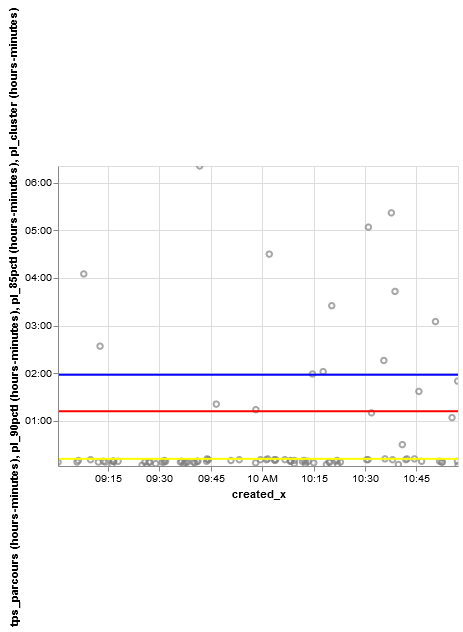

In [260]:
graph

POur obtenir une valeur de temps discriminatoire plus représentative que les percentiles on puet tenter l'approche par Cluster

In [216]:
#isoler les données necessaires
test_clus=toto.df_pl_ok.loc[:,['created_x','tps_parcours']].copy()

In [217]:
#convertir les temps en integer
test=((pd.to_datetime('2018-01-01')+test_clus['tps_parcours'])-pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')

In [218]:
#mise en forme des données pour passer dans sklearn 
donnnes = test.values
mat=donnnes.reshape(-1, 1)

In [246]:
#faire tourner la clusterisation et recupérer le label (i.e l'identifiant cluster)
clustering=DBSCAN(eps=300, min_samples=len(test)/1.5).fit(mat)
labels = clustering.labels_

In [247]:
labels

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1], dtype=int64)

In [248]:
#mettre en forme au format pandas
results = pd.DataFrame(pd.DataFrame([test_clus.index,labels]).T)
results.columns = ['index_base', 'cluster_num']
results = pd.merge(results,toto.df_pl_ok, left_on='index_base', right_index=True )

In [249]:
#pour graph
temp_parcours_max=results.loc[results.loc[:,'cluster_num']!=-1].groupby(['cluster_num'])['tps_parcours'].max()

In [233]:
#results['tps_parcours']=pd.to_datetime('2018-01-01')+results.tps_parcours
#results['tps_parcours_graph']=pd.to_datetime('2018-01-01')+pd.to_timedelta(temp_parcours_max.values[0])
graph_tps_bruts = alt.Chart(results.loc[:,['date_cam_1','tps_parcours_graph','cluster_num','tps_parcours']]).mark_point().encode(
                        x='date_cam_1',
                        y='hoursminutes(tps_parcours)',
                        color='cluster_num:N',
                        shape='cluster_num:N',
                        tooltip='hoursminutes(tps_parcours)')
graph_clust=alt.Chart(results.loc[:,['date_cam_1','tps_parcours_graph']]).mark_line(color='blue').encode(
                                 x='date_cam_1',
                                 y='hoursminutes(tps_parcours_graph)')

c:\users\martin.schoreisz\appdata\local\programs\python\python37\lib\site-packages\pandas\core\indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


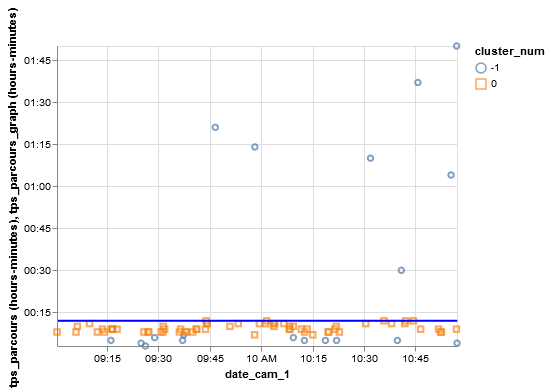

In [213]:
graph_tps_bruts+graph_clust

In [251]:
results['tps_parcours']=pd.to_datetime('2018-01-01')+results.tps_parcours
results['tps_parcours_graph']=pd.to_datetime('2018-01-01')+pd.to_timedelta(temp_parcours_max.values[0])
graph_tps_bruts = alt.Chart(results.loc[:,['created_x','tps_parcours_graph','cluster_num','tps_parcours']]).mark_point().encode(
                        x='created_x',
                        y='hoursminutes(tps_parcours)',
                        color='cluster_num:N',
                        shape='cluster_num:N',
                        tooltip='hoursminutes(tps_parcours)').interactive()
graph_clust=alt.Chart(results.loc[:,['created_x','tps_parcours_graph']]).mark_line(color='blue').encode(
                                 x='created_x',
                                 y='hoursminutes(tps_parcours_graph)')

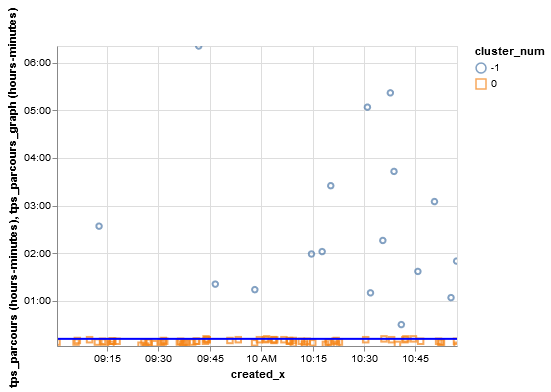

In [252]:
graph_tps_bruts+graph_clust